In [123]:
# Ներմուծում ենք dataset-ը

import kagglehub

path = kagglehub.dataset_download("shashanknecrothapa/ames-housing-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ames-housing-dataset


In [124]:
# install ենք անում python-ի package-ները

!pip install pandas numpy matplotlib seaborn plotly scikit-learn


In [125]:
# Ներմուծում ենք անհրաժեշտ գրադարանները

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [126]:
# Տպում ենք dataset-ի առաջին հինգ տողերը

df = pd.read_csv('/kaggle/input/ames-housing-dataset/AmesHousing.csv')
df.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [127]:
# Ներկայացրեք տողերի և սյունակների քանակը

n_rows, n_cols = df.shape
print(f"Number of rows : {n_rows}")
print(f"Number of columns: {n_cols}")


Number of rows : 2930
Number of columns: 82


In [128]:
# Ցուցադրեք տվյալների հավաքածուի յուրաքանչյուր սյան տիպը

pd.set_option('display.max_rows', None)
df.dtypes


,0
Order,int64
PID,int64
MS SubClass,int64
MS Zoning,object
Lot Frontage,float64
Lot Area,int64
Street,object
Alley,object
Lot Shape,object
Land Contour,object


In [129]:
# Ըստ սյուների վիճակագրական ամփոփ տվյալներ (միջին, մեծագույն արժեք, percentiles)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df.describe(include='all')

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2930,2440.000000,2930.000000,2930,198,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930.000000,2930.000000,2930.000000,2930.000000,2930,2930,2930,2930,1155,2907.000000,2930,2930,2930,2850,2850,2847,2850,2929.000000,2849,2929.000000,2929.000000,2929.000000,2930,2930,2930,2929,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930,2930.000000,2930,2930.000000,1508,2773,2771.000000,2771,2929.000000,2929.000000,2771,2771,2930,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,13,572,106,2930.000000,2930.000000,2930.000000,2930,2930,2930.000000
unique,NaN,NaN,NaN,7,NaN,NaN,2,2,4,4,3,5,3,28,9,8,5,8,NaN,NaN,NaN,NaN,6,8,16,17,4,NaN,4,5,6,5,5,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,8,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,4,4,5,NaN,NaN,NaN,10,6,NaN
top,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,BrkFace,NaN,TA,TA,PConc,TA,TA,No,GLQ,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,NaN,2273,NaN,NaN,2918,120,1859,2633,2927,2140,2789,443,2522,2900,2425,1481,NaN,NaN,NaN,NaN,2321,2887,1026,1015,880,NaN,1799,2549,1310,1283,2616,1906,859,NaN,2499,NaN,NaN,NaN,2885,1495,2734,2682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1494,NaN,2728,NaN,744,1731,NaN,1231,NaN,NaN,2615,2665,2652,NaN,NaN,NaN,NaN,NaN,NaN,4,330,95,NaN,NaN,NaN,2536,2413,NaN
mean,1465.50000,7.144645e+08,57.387372,NaN,69.224590,10147.921843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.094881,5.563140,1971.356314,1984.266553,NaN,NaN,NaN,NaN,NaN,101.896801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,442.629566,NaN,49.722431,559.262547,1051.614544,NaN,NaN,NaN,NaN,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,NaN,6.443003,NaN,0.599317,NaN,NaN,1978.132443,NaN,1.766815,472.819734,NaN,NaN,NaN,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,NaN,NaN,NaN,50.635154,6.216041,2007.790444,NaN,NaN,180796.060068
std,845.96247,1.887308e+08,42.638025,NaN,23.365335,7880.017759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.411026,1.111537,30.245361,20.860286,NaN,NaN,NaN,NaN,NaN,179.112611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.590839,NaN,169.168476,439.494153,440.615067,NaN,NaN,NaN,NaN,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,NaN,1.572964,NaN,0.647921,NaN,NaN,25.528411,NaN,0.760566,215.046549,NaN,NaN,NaN,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,NaN,NaN,NaN,566.344288,2.714492,1.316613,NaN,NaN,79886.692357
min,1.00000,5.263011e+08,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,

In [130]:
# Գտնում ենք կորելացիայի մատրիցը

# Compute correlation matrix (Pearson) for numeric columns
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# Show the full matrix (all columns)
pd.set_option('display.max_columns', None)
corr_matrix

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.173593,0.011797,-0.007034,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,-0.032321,-0.002773,0.005780,-0.028719,-0.013201,-0.000417,0.013589,-0.009342,-0.042539,0.024978,-0.044985,-0.039749,0.015424,-0.017685,0.002612,-0.019156,-0.051160,-0.036185,-0.035435,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,-0.098375,-0.001145,-0.087707,-0.189642,-0.141902,-0.003289,0.056940,-0.107579,-0.037759,0.004328,-0.171431,-0.166636,0.006345,0.076470,-0.068981,-0.108056,-0.256829,-0.237484,-0.210606,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,-0.060075,-0.070946,-0.130421,-0.219445,-0.247828,0.304237,0.025765,0.068061,0.013701,-0.003329,0.134631,0.175879,-0.019208,0.257698,0.031898,-0.049955,0.088754,-0.045883,-0.103239,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.007034,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,0.215583,0.045999,0.116743,0.353773,0.457391,0.029187,0.005249,0.383822,0.108915,-0.024724,0.184521,0.041880,0.240442,0.005407,0.353137,0.257255,0.076306,0.308706,0.358505,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.031354,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,0.191555,0.083150,0.023658,0.253589,0.332235,0.032996,0.000812,0.285599,0.125877,0.026903,0.127433,0.035497,0.136569,-0.020301,0.216597,0.256989,-0.008952,0.179512,0.212822,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.048500,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,0.284118,-0.041287,0.270058,0.547294,0.477837,0.241402,-0.048680,0.570556,0.167858,-0.041647,0.522263,0.268853,0.063291,-0.159744,0.380693,0.393007,0.570569,0.599545,0.563503,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.011054,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,-0.050935,0.041134,-0.136819,-0.173344,-0.157052,0.006218,0.009175,-0.115643,-0.042766,0.084455,-0.214316,-0.088127,-0.006137,-0.086386,-0.089816,-0.031702,-0.326017,-0.181557,-0.153754,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.052319,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,0.279870,-0.027415,0.128998,0.407526,0.310463,0.016828,-0.144282,0.241726,0.211849,-0.030626,0.469406,0.269268,-0.055093,-0.137852,0.111919,0.170672,0.834849,0.537443,0.480131,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.075566,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,0.151790,-0.062129,0.164805,0.297481,0.242108,0.158939,-0.060365,0.316855,0.134387,-0.046292,0.457266,0.211771,-0.021536,-0.142404,0.197528,0.133322,0.652310,0.425403,0.376438,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.030907,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,0.301872,-0.016019,0.091668,0

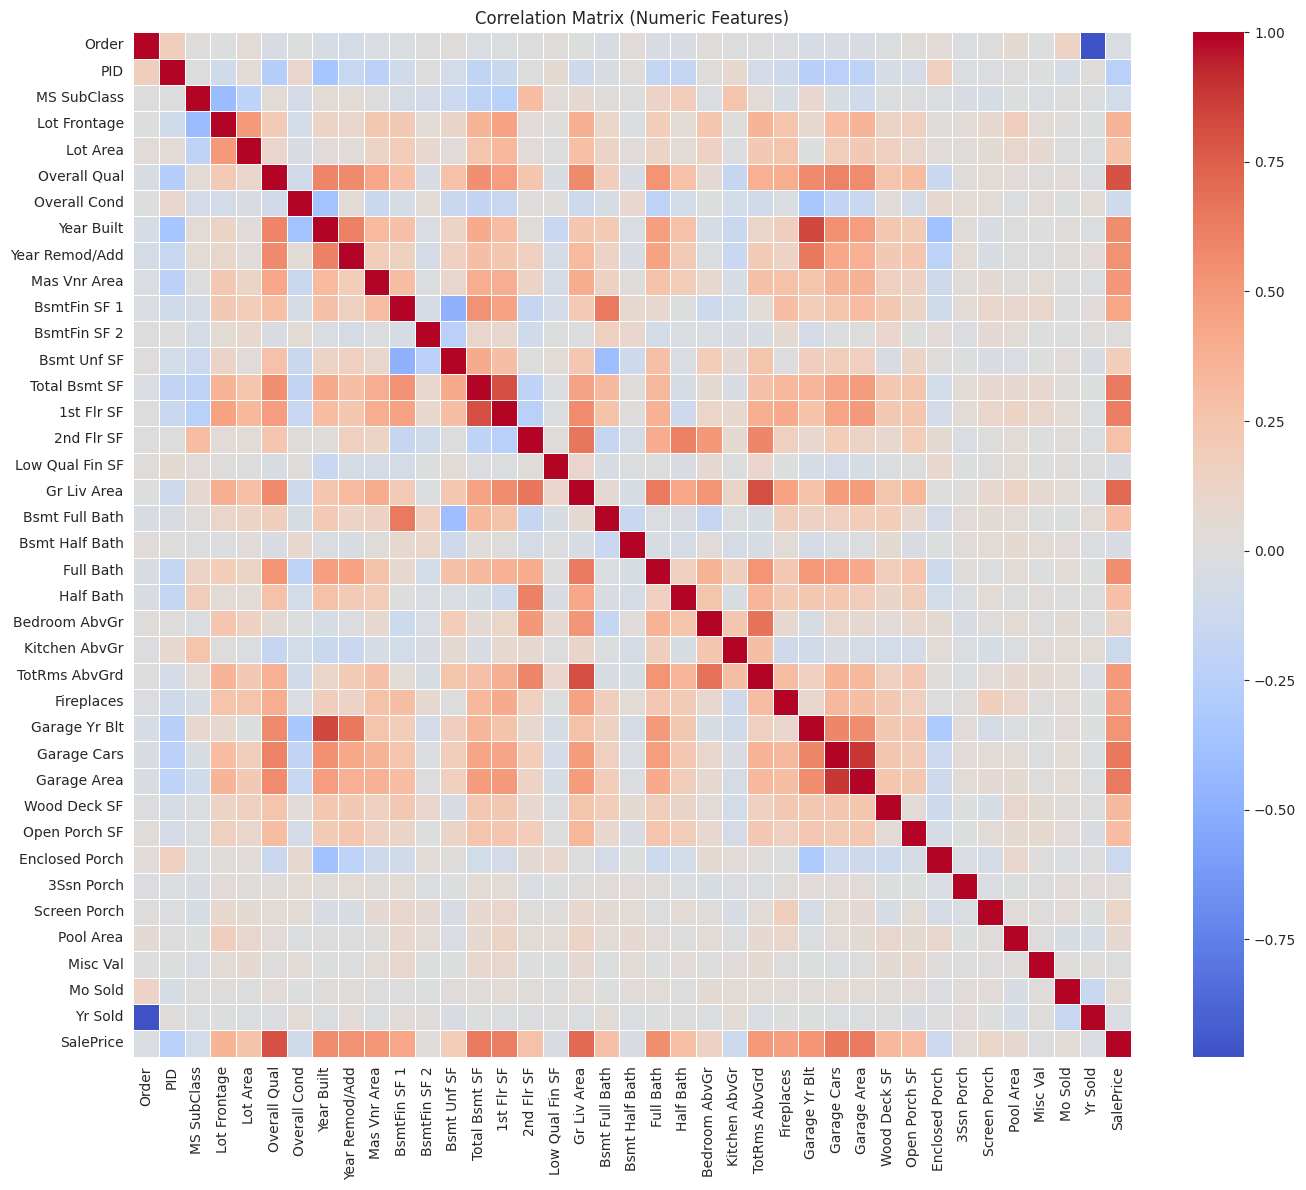

In [131]:
# Պատկերում ենք կորելացիայի մատրիցը

# Set up the figure size
plt.figure(figsize=(14, 12))

# Draw a heatmap with annotation
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    annot=False  # Change to True if you want the correlation values on the heatmap
)

plt.title("Correlation Matrix (Numeric Features)")
plt.tight_layout()
plt.show()

In [132]:
# Գնի հետ 10 ամենաշատ կորելացված սյուները

# Assuming 'SalePrice' is the target
target_corr = corr_matrix['SalePrice'].abs().sort_values(ascending=False)
top_n = 10
print(f"Top {top_n} features most correlated with SalePrice:\n")
print(target_corr.head(top_n + 1))  # +1 to include SalePrice itself


Top 10 features most correlated with SalePrice:

SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Garage Yr Blt     0.526965
Name: SalePrice, dtype: float64


In [133]:
# Ստուգում ենք բացակայող արժեքները

# 1) Count of missing values (NaN) in each column
missing_counts = df.isna().sum().sort_values(ascending=False)
# 2) Percentage of missing values
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False).round(2)

# 3) Combine into a single DataFrame for display
missing_df = pd.concat([missing_counts, missing_pct], axis=1, keys=['MissingCount', 'MissingPct'])
missing_df[missing_df['MissingCount'] > 0]


,MissingCount,MissingPct
Pool QC,2917,99.56
Misc Feature,2824,96.38
Alley,2732,93.24
Fence,2358,80.48
Mas Vnr Type,1775,60.58
Fireplace Qu,1422,48.53
Lot Frontage,490,16.72
Garage Qual,159,5.43
Garage Yr Blt,159,5.43
Garage Cond,159,5.43


In [134]:
# Ստեղծում ենք մեթոդներ բացակայող արժեքները լրացնելու կամ հեռացնելու համար

# 1) Remove columns with too many missing (e.g., > 50%)
threshold = 50.0
cols_to_drop = missing_df[missing_df['MissingPct'] > threshold].index.tolist()
df = df.drop(columns=cols_to_drop)

# 2) Remove rows where a specific critical column is missing
#    (e.g., drop rows where 'LotFrontage' is null)
if 'LotFrontage' in df.columns:
    df = df[ df['LotFrontage'].notnull() ]

# 3) For numeric columns: fill missing with median
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)

# 4) For categorical columns: fill missing with mode
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
for col in cat_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)

# Verify no missing remain
df.isnull().sum().sort_values(ascending=False).head()


<ipython-input-134-9ccb3bf37e02>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-134-9ccb3bf37e02>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,0
Order,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,0


In [135]:
# Ստուգում ենք որ սյուները պակասեցին
df.shape

(2930, 77)

In [136]:
# Եթե տվյալների հավաքածուի մեջ կան կատեգորիկ տվյալները (օրինակ՝ «Car Model» կամ այլ տեքստային սյունակներ) վերափոխեք այնպես, որպեսզի  հնարավոր լինի այն փոխանցել ձեր մեքենայական ուսուցման մոդելին։

# Identify categorical columns again (object or category dtypes)
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# One‐hot encode, dropping first level to avoid dummy‐trap
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Confirm that no columns of dtype object remain
print("Any object‐dtype columns left? ", any(df_encoded.dtypes == 'object'))
print("Shape after encoding:", df_encoded.shape)

Any object‐dtype columns left?  False
Shape after encoding: (2930, 249)


In [137]:
sns.set_style("whitegrid")

In [138]:
# Identify remaining numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Numeric columns ({len(numeric_cols)}): {numeric_cols}")
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")


Numeric columns (39): ['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']
Categorical columns (38): ['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC'

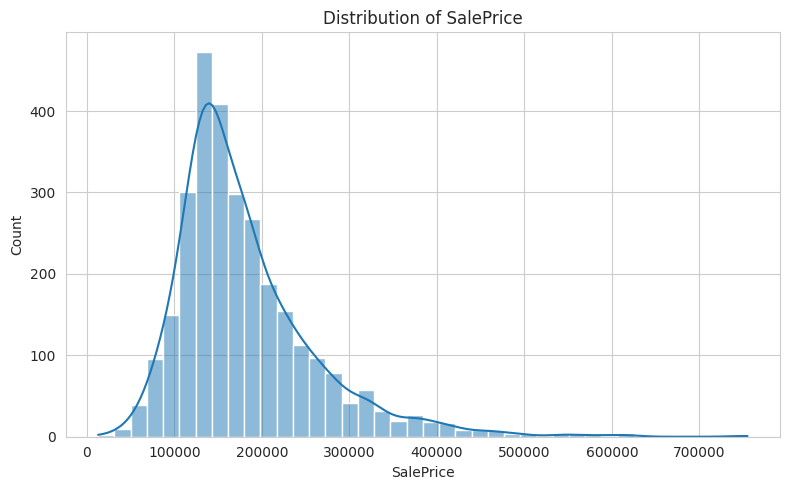

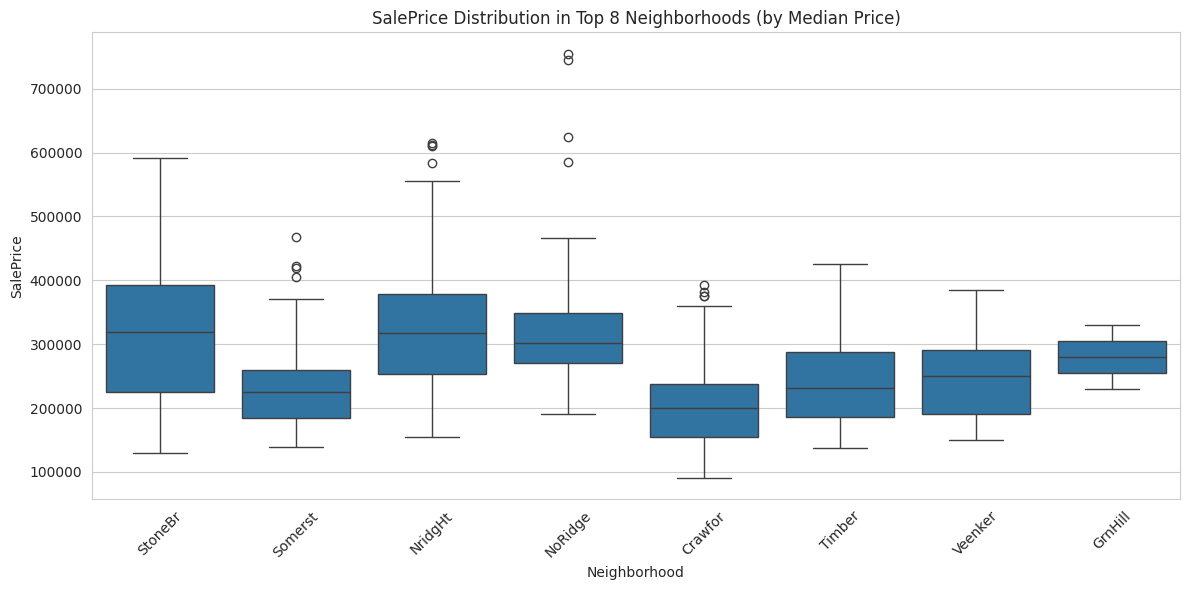

In [139]:
# Տեսողական վերլուծություն (օրինակ՝ matplotlib, plotly, seaborn գրադարաններով)

plt.figure(figsize=(8, 5))
sns.histplot(df['SalePrice'], bins=40, kde=True)
plt.xlabel("SalePrice")
plt.title("Distribution of SalePrice")
plt.tight_layout()
plt.show()

# Boxplot of SalePrice grouped by Neighborhood (show top 8 by median SalePrice)
# Compute median SalePrice per neighborhood
median_by_neigh = df.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=False)

# Select top 8 neighborhoods
top_neigh = median_by_neigh.index[:8].tolist()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df[df['Neighborhood'].isin(top_neigh)])
plt.xlabel("Neighborhood")
plt.xticks(rotation=45)
plt.ylabel("SalePrice")
plt.title("SalePrice Distribution in Top 8 Neighborhoods (by Median Price)")
plt.tight_layout()
plt.show()

In [140]:
# Ստուգեք ծայրահեղ արժեքների առկայությունը և կատարեք համապատասխան քայլեր։

# 1) Identify numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# 2) Compute IQR, lower, and upper bounds for each numeric column
outlier_info = []
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Count how many points lie outside these bounds
    n_lower = (df[col] < lower_bound).sum()
    n_upper = (df[col] > upper_bound).sum()
    outlier_info.append({
        'feature': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'n_lower': n_lower,
        'n_upper': n_upper,
        'total_outliers': n_lower + n_upper
    })

outlier_df = pd.DataFrame(outlier_info).sort_values(by='total_outliers', ascending=False)
print("Outlier summary (top 10 features by count):")
print(outlier_df[['feature', 'n_lower', 'n_upper', 'total_outliers']].head(10))

df_capped = df.copy()
for _, row in outlier_df.iterrows():
    col = row['feature']
    lb = row['lower_bound']
    ub = row['upper_bound']
    df_capped[col] = np.where(df_capped[col] < lb, lb,
                              np.where(df_capped[col] > ub, ub, df_capped[col]))
print(f"Shape after capping outliers (no rows removed): {df_capped.shape}")


Outlier summary (top 10 features by count):
           feature  n_lower  n_upper  total_outliers
31  Enclosed Porch        0      459             459
11    BsmtFin SF 2        0      351             351
3     Lot Frontage      126      135             261
33    Screen Porch        0      256             256
6     Overall Cond       67      185             252
2      MS SubClass        0      208             208
9     Mas Vnr Area        0      203             203
19  Bsmt Half Bath        0      175             175
30   Open Porch SF        0      159             159
38       SalePrice        0      137             137
Shape after capping outliers (no rows removed): (2930, 77)


In [141]:
# Անհրաժեշտության դեպքում կատարեք տվյաների նորմավորում։

# 1) Choose source DataFrame: use df_capped if available, otherwise df_encoded
try:
    source_df = df_capped.copy()
except NameError:
    source_df = df_encoded.copy()

# 2) Identify numeric feature columns (exclude the target 'SalePrice' or 'LogSalePrice')
numeric_cols = source_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for target in ['SalePrice', 'LogSalePrice']:
    if target in numeric_cols:
        numeric_cols.remove(target)

# 3) Create a copy to hold normalized data
df_norm = source_df.copy()

# 4) Apply Min-Max scaling to numeric columns
minmax = MinMaxScaler()
df_norm[numeric_cols] = minmax.fit_transform(df_norm[numeric_cols])

# 5) (Optional) Compare original vs. normalized values for first few rows of a subset
compare_cols = numeric_cols[:5]  # first five numeric features
comparison = pd.concat([
    source_df[compare_cols].head(),
    df_norm[compare_cols].head()
], axis=1, keys=['Original', 'Normalized'])
print("Original vs. Normalized (first 5 rows):\n", comparison)

# 6) Verify that target column remains unchanged
for target in ['SalePrice', 'LogSalePrice']:
    if target in source_df.columns:
        print(f"\n{target} (unchanged):\n", source_df[target].head())
        break

Original vs. Normalized (first 5 rows):
   Original                                                 Normalized  \
     Order          PID MS SubClass Lot Frontage  Lot Area      Order   
0      1.0  526301100.0        20.0        105.0  17727.75   0.000000   
1      2.0  526350040.0        20.0         80.0  11622.00   0.000341   
2      3.0  526351010.0        20.0         81.0  14267.00   0.000683   
3      4.0  526353030.0        20.0         93.0  11160.00   0.001024   
4      5.0  527105010.0        60.0         74.0  13830.00   0.001366   

                                                
        PID MS SubClass Lot Frontage  Lot Area  
0  0.000000        0.00     1.000000  1.000000  
1  0.000102        0.00     0.652778  0.628327  
2  0.000104        0.00     0.666667  0.789335  
3  0.000108        0.00     0.833333  0.600204  
4  0.001672        0.32     0.569444  0.762734  

SalePrice (unchanged):
 0    215000.0
1    105000.0
2    172000.0
3    244000.0
4    189900.0
Name: Sal

In [142]:
# Գծային ռեգռեսիայի մոդել

# Assume target column is 'SalePrice'
y = df_encoded['SalePrice']
X = df_encoded.drop(columns=['SalePrice'])

# Split into train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Fit Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test set
y_pred = lr.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Baseline Linear Regression:\nMAE={mae:.2f}\nMSE={mse:.2f}\nRMSE = {rmse:.2f}\nR² = {r2:.4f}")


Baseline Linear Regression:
MAE=16325.45
MSE=853852103.23
RMSE = 29220.75
R² = 0.8935


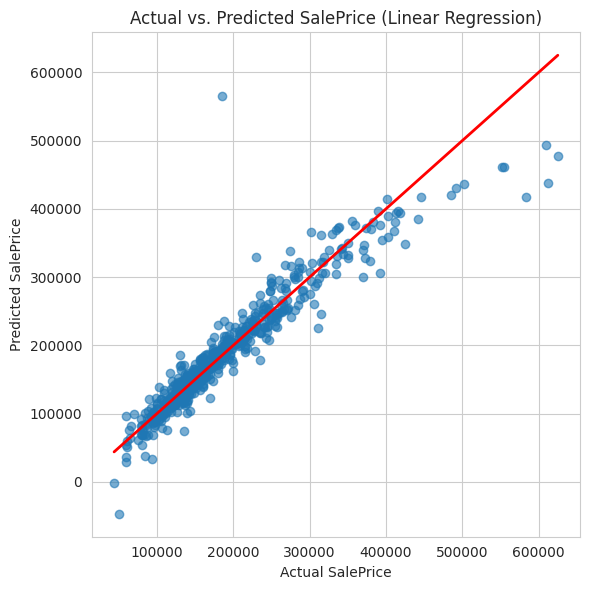

In [143]:
# Plot actual vs. predicted SalePrice

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', lw=2)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs. Predicted SalePrice (Linear Regression)")
plt.tight_layout()
plt.show()


In [144]:
# Create a copy of the DataFrame so that original data is preserved
df_scaled = df_encoded.copy()


In [145]:
df_encoded.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sa

In [146]:
df_scaled.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sa

In [147]:
# Identify numeric columns (excluding the target) and scale them in df_scaled

# Assume target is 'SalePrice'; adjust if you used 'LogSalePrice'
target_col = 'SalePrice'

# List all numeric feature columns in df_scaled (datatype int or float)
num_features = df_scaled.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_features.remove(target_col)  # exclude target

# Fit a StandardScaler on the numeric features and transform in-place
scaler = StandardScaler()
df_scaled[num_features] = scaler.fit_transform(df_scaled[num_features])

# Show head of original vs. scaled numeric columns for comparison
print("Original vs. Scaled (first 5 rows):\n")
compare_cols = num_features[:5]  # just show first five numeric features
for col in compare_cols:
    print(f"{col} (orig) -> {col} (scaled)")
    print(pd.concat([
        df_encoded[col].head(),
        df_scaled[col].head()
    ], axis=1, keys=['orig', 'scaled']))
    print()


Original vs. Scaled (first 5 rows):

Order (orig) -> Order (scaled)
   orig    scaled
0     1 -1.731460
1     2 -1.730277
2     3 -1.729095
3     4 -1.727913
4     5 -1.726731

PID (orig) -> PID (scaled)
        orig    scaled
0  526301100 -0.997164
1  526350040 -0.996904
2  526351010 -0.996899
3  526353030 -0.996888
4  527105010 -0.992903

MS SubClass (orig) -> MS SubClass (scaled)
   orig    scaled
0    20 -0.877005
1    20 -0.877005
2    20 -0.877005
3    20 -0.877005
4    60  0.061285

Lot Frontage (orig) -> Lot Frontage (scaled)
    orig    scaled
0  141.0  3.375742
1   80.0  0.514952
2   81.0  0.561850
3   93.0  1.124628
4   74.0  0.233563

Lot Area (orig) -> Lot Area (scaled)
    orig    scaled
0  31770  2.744381
1  11622  0.187097
2  14267  0.522814
3  11160  0.128458
4  13830  0.467348



In [148]:
df_scaled.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sa

In [149]:
# Run baseline Linear Regression on both original and scaled data, using identical train/test splits

# Prepare X and y for original and scaled datasets
X_orig = df_encoded.drop(columns=[target_col])
y_orig = df_encoded[target_col]

X_scl  = df_scaled.drop(columns=[target_col])
y_scl  = df_scaled[target_col]  # same as y_orig, but included for clarity

# Split both into train/test with the same random state
Xo_train, Xo_test, yo_train, yo_test = train_test_split(
    X_orig, y_orig, test_size=0.20, random_state=42
)
Xs_train, Xs_test, ys_train, ys_test = train_test_split(
    X_scl,  y_scl,  test_size=0.20, random_state=42
)

# Fit LinearRegression on original data
lr_orig = LinearRegression()
lr_orig.fit(Xo_train, yo_train)
yo_pred = lr_orig.predict(Xo_test)

# Fit LinearRegression on scaled data
lr_scl = LinearRegression()
lr_scl.fit(Xs_train, ys_train)
ys_pred = lr_scl.predict(Xs_test)

# 3.5: Compute metrics for both
mse_orig = mean_squared_error(yo_test, yo_pred)
rmse_orig = np.sqrt(mse_orig)
r2_orig  = r2_score(yo_test, yo_pred)

mse_scl  = mean_squared_error(ys_test, ys_pred)
rmse_scl = np.sqrt(mse_scl)
r2_scl   = r2_score(ys_test, ys_pred)

# 3.6: Print comparison
print("Baseline Linear Regression Performance:\n")
print(f"→ Original data:\n   RMSE = {rmse_orig:.10f}\n   R²   = {r2_orig:.10f}\n")
print(f"→ Scaled   data:\n   RMSE = {rmse_scl:.10f}\n   R²   = {r2_scl:.10f}")


Baseline Linear Regression Performance:

→ Original data:
   RMSE = 29220.7478212668
   R²   = 0.8935020893

→ Scaled   data:
   RMSE = 29220.7467069887
   R²   = 0.8935020975


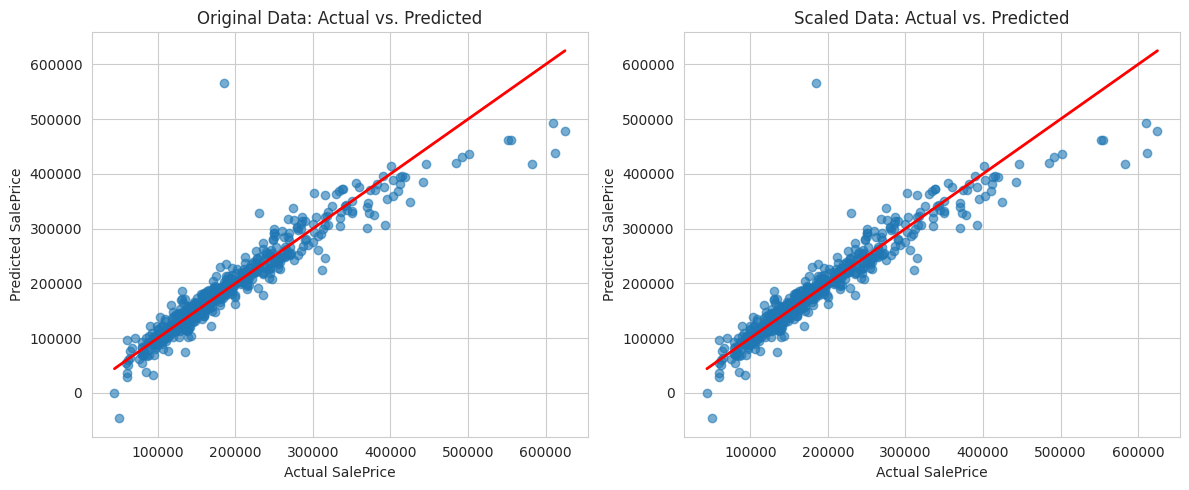

In [150]:
# Plot Actual vs. Predicted for both original and scaled versions side by side

plt.figure(figsize=(12, 5))

# Original data plot
plt.subplot(1, 2, 1)
plt.scatter(yo_test, yo_pred, alpha=0.6)
plt.plot([yo_test.min(), yo_test.max()], [yo_test.min(), yo_test.max()], color='red', linewidth=2)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Original Data: Actual vs. Predicted")

# Scaled data plot
plt.subplot(1, 2, 2)
plt.scatter(ys_test, ys_pred, alpha=0.6)
plt.plot([ys_test.min(), ys_test.max()], [ys_test.min(), ys_test.max()], color='red', linewidth=2)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Scaled Data: Actual vs. Predicted")

plt.tight_layout()
plt.show()

In [151]:
# Մոդելը ուսուցանելուց հետո տպեք մոդելի գործակիցները (coefficients) և ազատ անդամը (intercept):

# 1) Create a pandas Series mapping feature names to coefficients
coef_series = pd.Series(lr.coef_, index=X.columns)

# 2) Sort by coefficient value (largest positive to largest negative)
coef_sorted = coef_series.sort_values(ascending=False)

# 3) Display the sorted coefficients and the intercept
print("Intercept:", lr.intercept_)
print("\nFeature coefficients (sorted):\n", coef_sorted)


Intercept: 2859668.8335473086

Feature coefficients (sorted):
 Roof Matl_Membran         6.635343e+05
Roof Matl_WdShngl         6.582969e+05
Roof Matl_Metal           6.542212e+05
Roof Matl_Roll            6.114601e+05
Roof Matl_Tar&Grv         6.102808e+05
Roof Matl_WdShake         6.021717e+05
Roof Matl_CompShg         5.956931e+05
Neighborhood_GrnHill      1.085234e+05
Condition 2_RRAe          7.423418e+04
Garage Cond_TA            5.994731e+04
Garage Cond_Po            5.778421e+04
Garage Cond_Fa            5.670257e+04
Garage Cond_Gd            5.636294e+04
Bsmt Cond_Po              4.448754e+04
Neighborhood_StoneBr      4.125882e+04
Exterior 1st_PreCast      3.875839e+04
Exterior 2nd_PreCast      3.875839e+04
Condition 2_PosA          3.611891e+04
Sale Type_Con             3.239548e+04
Neighborhood_NoRidge      3.133773e+04
Roof Style_Hip            2.984683e+04
Exterior 2nd_AsphShn      2.893497e+04
Roof Style_Gable          2.889877e+04
Roof Style_Gambrel        2.865144e+04
S

In [152]:
# Համեմատում ենք այլ մոդելների հետ

# 1) Prepare features and target
X = df_encoded.drop(columns=['SalePrice'])
y = df_encoded['SalePrice']

# 2) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# 3) Define a dictionary of models to evaluate
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0, random_state=42),
    'Lasso': Lasso(alpha=0.001, random_state=42, max_iter=5000),
    'ElasticNet': ElasticNet(alpha=0.001, l1_ratio=0.5, random_state=42, max_iter=5000),
    'DecisionTree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                                  max_depth=3, random_state=42)
}

# 4) Helper to compute regression metrics
def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2  = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# 5) Train each model, predict on test set, and record metrics
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae, mse, rmse, r2 = regression_metrics(y_test, y_pred)
    results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    })

# 6) Create a DataFrame of results and sort by RMSE
results_df = pd.DataFrame(results).sort_values(by='RMSE').reset_index(drop=True)
results_df


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.37925e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.121e+11, tolerance: 1.394e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.427e+11, tolerance: 1.394e+09
  model = cd_fast.enet_coordinate_descent(


,Model,MAE,MSE,RMSE,R²
0,GradientBoosting,15238.021661,6.293760e+08,25087.366352,0.921500
1,Lasso,16306.357128,8.485590e+08,29130.036130,0.894162
2,LinearRegression,16325.446942,8.538521e+08,29220.747821,0.893502
3,Ridge,16997.334430,8.642352e+08,29397.877042,0.892207
4,ElasticNet,17002.388627,8.642661e+08,29398.403674,0.892203
5,DecisionTree,23615.689099,1.262785e+09,35535.682443,0.842497


In [153]:
# Հնարավորության դեպքում ձեր տվյալների հիման վրա ստեղծեք նոր feature-ներ (սյուներ)

# 1) Create engineered features on a copy of the DataFrame `df`
df_feat = df.copy()

# a) Total square footage (first floor + second floor + basement)
if {'1stFlrSF', '2ndFlrSF', 'TotalBsmtSF'}.issubset(df_feat.columns):
    df_feat['TotalSF'] = df_feat['1stFlrSF'] + df_feat['2ndFlrSF'] + df_feat['TotalBsmtSF']

# b) Total bathrooms (full + half, counting half-baths as 0.5)
df_feat['TotalBath'] = 0
if 'FullBath' in df_feat.columns:
    df_feat['TotalBath'] += df_feat['FullBath']
if 'HalfBath' in df_feat.columns:
    df_feat['TotalBath'] += 0.5 * df_feat['HalfBath']
if 'BsmtFullBath' in df_feat.columns:
    df_feat['TotalBath'] += df_feat['BsmtFullBath']
if 'BsmtHalfBath' in df_feat.columns:
    df_feat['TotalBath'] += 0.5 * df_feat['BsmtHalfBath']

# c) House age (relative to year 2025)
if 'YearBuilt' in df_feat.columns:
    df_feat['HouseAge'] = 2025 - df_feat['YearBuilt']

# d) Remodeled indicator (1 if YearRemodAdd != YearBuilt)
if {'YearBuilt', 'YearRemodAdd'}.issubset(df_feat.columns):
    df_feat['Remodeled'] = (df_feat['YearRemodAdd'] != df_feat['YearBuilt']).astype(int)

# 2) One‐hot encode remaining categorical columns
cat_cols = df_feat.select_dtypes(include=['object', 'category']).columns.tolist()
df_feat_enc = pd.get_dummies(df_feat, columns=cat_cols, drop_first=True)

# 3) Normalize numeric features (Min-Max scaling), keeping target 'SalePrice' unchanged
numeric_cols = df_feat_enc.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'SalePrice' in numeric_cols:
    numeric_cols.remove('SalePrice')

df_feat_norm = df_feat_enc.copy()
scaler = MinMaxScaler()
df_feat_norm[numeric_cols] = scaler.fit_transform(df_feat_norm[numeric_cols])

# 4) Split into X and y, then train/test split
X = df_feat_norm.drop(columns=['SalePrice'])
y = df_feat_norm['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# 5) Fit Linear Regression on the engineered + normalized data
lr = LinearRegression()
lr.fit(X_train, y_train)

# 6) Predict and evaluate on the test set
y_pred = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print(f"Linear Regression on engineered + normalized data:\n  RMSE = {rmse:.2f}\n  R²   = {r2:.4f}")

Linear Regression on engineered + normalized data:
  RMSE = 29220.75
  R²   = 0.8935
